## Streaming Jobs using Python
- For streaming Map Reduce jobs in Hadoop Python was used. This notebook shows what kind of data was dealt with and the outputs generated by the programs!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,ImageColorGenerator
import numpy as np

In [3]:
!ls data

question_length_and_average_answer_length  student_times
student_group_output			   top_tags_output
student_test_posts.csv


In [4]:
tst_p = pd.read_csv('data/student_test_posts.csv',sep = '\t',header = None)
tst_p.head(12)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,111,Why can't I watch video udacity?,video cs101 meta bug issues nationalities,100000066,<p>I am come from china.How to?</p>,question,\N,\N,2012-02-21 05:08:03.824261+00,0,NaN,100075539,100000239,2012-02-22 21:36:17.077627+00,100013171,\N,\N,1214,f
1,2,Welcome to the Udacity CS101 Forum!,cs101 welcome,100000005,<p>Welcome to the Udacity CS101 Discussion For...,question,\N,\N,2012-02-20 01:36:05.717881+00,16,NaN,\N,100006869,2012-02-28 18:47:08.806379+00,2,\N,\N,861,f
2,3848,NaN,cs101 number strings homework,100000066,<p>Why we count ''0'' for <strong>start</stron...,answer,3778,3778,2012-02-23 01:03:07.15577+00,1,NaN,\N,100000691,2012-02-24 10:29:33.377435+00,4965,\N,\N,280,f
3,66193,"Have the courses cs212, cs253, and cs262 sta...",cs101 cs212 cs262 cs253 discussion meta welcom...,100007808,"<p>Today is 4/16/12, have the courses gone l...",question,\N,\N,2012-04-16 12:36:08.043022+00,0,(closed),208069,100007808,2012-04-16 12:49:23.453084+00,87554,\N,\N,680,t
4,66199,NaN,cs101,100004467,"<p>Not yet, hopefully soon ...</p>",answer,66193,66193,2012-04-16 12:39:40.572717+00,0,NaN,\N,100004467,2012-04-16 12:39:40.572717+00,87560,\N,\N,0,f
5,66196,NaN,cs101,100071170,"<p>Officially not, supposed to be it will be o...",answer,66193,66193,2012-04-16 12:38:40.377037+00,0,NaN,\N,100000957,2012-04-16 12:38:40.377037+00,87557,\N,\N,0,f
6,66195,NaN,cs101,100002460,"<p>kinda, see <a href=""""http://www.udacity-for...",answer,66193,66193,2012-04-16 12:38:31.611927+00,0,NaN,\N,100003934,2012-04-16 12:38:31.611927+00,87556,\N,\N,0,f
7,6012754,Official Deadlines Homeworks,cs253 hw2-1 homework deadlines,100004819,<p>I would like to know when is the deadline o...,question,\N,\N,2012-05-01 04:44:44.410042+00,1,(wiki),\N,100004823,2012-05-01 05:24:19.434785+00,6015840,\N,\N,362,f
8,6011209,NaN,cs253,100010128,<p>i is out of range</p>\n<pre><code>for i in ...,answer,6011204,6011204,2012-04-29 14:45:19.216809+00,1,NaN,\N,100010128,2012-04-29 14:45:19.216809+00,6013891,\N,\N,0,f
9,6011208,NaN,cs253,100071170,"<pre><code>s=""abc""\nprint s[4]\n</code></pre>\...",answer,6011204,6011204,2012-04-29 12:44:14.449528+00,1,NaN,\N,100001071,2012-04-29 12:44:14.449528+00,6013889,\N,\N,0,f


Above dataframe contains following columns - 

id, title , tagnames, author_id, body, node_type, parent_id, abs_parent_id, added_at, score, state_string, last_edited_id,last_activity_id, last_activity_at, activity_revision_id, extra, extra_ret_id


- mapper1.py reducer1.py - For Top Tags used .. mapper returns: after reading data tags seprated along with their count. reducer: computation on mapper
- mapper2.py reducer2.py - Maximum active hours ( The same job is also done using Pig)
- mapper3.py reducer3.py - Question answer Lengths corr.
- mapper4.py reducer4.py - Groups student based on their activity on forum. Map reduce for each forum thread.... refer script!

## OUTPUTS



In [5]:
q_ans = pd.read_csv('data/question_length_and_average_answer_length',sep = '\t')
student_grp_output = pd.read_csv('data/student_group_output',sep = '\t',header = None, names = 'Uid Groups'.split())
student_times = pd.read_csv('data/student_times', sep = '\t')
top_tags = pd.read_csv('data/top_tags_output',sep = '\t',names = 'Tag Counts'.split())

### Question_answers lengths

In [6]:
q_ans.head(10)

,QID,Question_Length,Answer_length
0,10000001,140.0,327.955224
1,10000002,625.0,516.750000
2,10000006,836.0,0.000000
3,10000007,4224.0,671.666667
4,1000001,258.0,95.428571
5,10000016,44.0,68.000000
6,10000018,452.0,272.666667
7,1000003,146.0,520.000000
8,10000033,216.0,821.375000
9,10000036,496.0,231.625000


In [7]:
df = q_ans.groupby('QID').sum()
df.head()

,Question_Length,Answer_length
QID,,
2,145.0,128.136364
9,346.0,239.802353
15,58.0,174.714286
17,350.0,358.000000
40,25.0,74.571429


In [8]:
df.corr(method = 'spearman')

,Question_Length,Answer_length
Question_Length,1.00000,0.21716
Answer_length,0.21716,1.00000


### Tags

In [9]:
top_tags

,Tag,Counts
0,cs101,11622
1,cs373,4952
2,cs253,4542
3,discussion,3560
4,meta,2664
5,cs212,2009
6,homework,1682
7,bug,1651
8,cs262,1561
9,st101,1489


In [10]:
d = {}
for i in range(10):
    d[top_tags['Tag'][i]] = top_tags['Counts'][i]

In [11]:
d

{'cs101': 11622,
 'cs373': 4952,
 'cs253': 4542,
 'discussion': 3560,
 'meta': 2664,
 'cs212': 2009,
 'homework': 1682,
 'bug': 1651,
 'cs262': 1561,
 'st101': 1489}

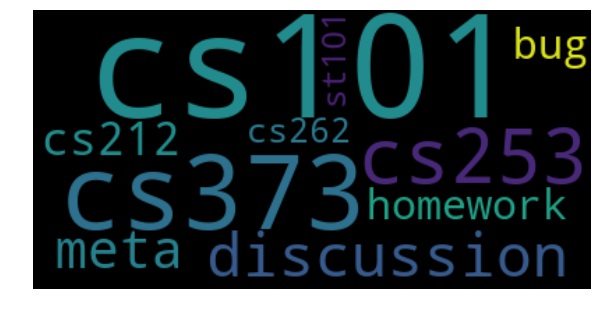

In [12]:
plt.figure(figsize=(10,7))
wordcloud = WordCloud().generate_from_frequencies(d)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Student Group Output

In [13]:
student_grp_output.head(8)

,Uid,Groups
0,10000001,"[100103306, 100102548, 100031741, 100082748, 1..."
1,10000002,"[100000075, 100033603, 100031854, 100022806, 1..."
2,10000005,[100023802]
3,10000006,"[100001730, 100027424, 100027859, 100027859]"
4,10000007,"[100005156, 100023802, 100064325, 100023538, 1..."
5,1000001,"[100010797, 100009550, 100005361, 100008401, 1..."
6,10000011,[100023319]
7,10000016,"[100037992, 100008072]"


### Maximum activity

In [14]:
student_times.head()

,author_id,Most_active_hours
0,100000000,9
1,100000002,4
2,100000003,5
3,100000005,1
4,100000007,3


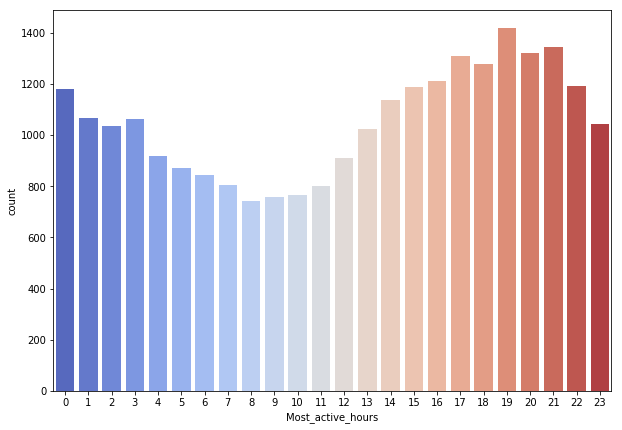

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Most_active_hours', data = student_times, palette='coolwarm')